In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
import warnings
import math
import random
warnings.filterwarnings('ignore')
import timeit
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
url =  "C:/Users/fatih/Desktop/features.xls"
data = pd.read_excel('C:/Users/fatih/Desktop/featuress.xlsx', sheetname='Features')


In [2]:
data.head(6)

,TextID,URL,Label,totalWordsCount,semanticobjscore,semanticsubjscore,CC,CD,DT,EX,...,pronouns2nd,pronouns3rd,compsupadjadv,past,imperative,present3rd,present1st2nd,sentence1st,sentencelast,txtcomplexity
0,Text0001,http://msn.foxsports.com/foxsoccer/mexico/stor...,objective,109,0,1,7,9,0,5,...,0,3,0,11,0,0,0,0,1,18
1,Text0002,http://msn.foxsports.com/foxsoccer/premierleag...,objective,309,21,4,1,19,1,4,...,0,10,0,13,0,14,9,1,1,14
2,Text0003,http://uk.eurosport.yahoo.com/04022011/58/fed-...,objective,149,6,1,8,14,0,5,...,0,2,0,8,0,3,2,1,1,18
3,Text0004,http://uk.eurosport.yahoo.com/07022011/58/bund...,objective,305,18,5,7,26,0,10,...,0,8,3,13,1,7,1,1,1,20
4,Text0005,http://uk.eurosport.yahoo.com/05022011/58/fed-...,objective,491,23,8,33,47,0,12,...,0,16,2,34,1,5,6,1,1,24
5,Text0006,http://msn.foxsports.com/nba/story/julius-ervi...,objective,314,14,1,17,17,0,0,...,0,16,3,24,0,5,1,1,1,18


In [3]:
X = data.iloc[:, 4:63].values
y = data.iloc[:, 2].values

In [4]:
X[0]


array([ 0,  1,  7,  9,  0,  5,  8,  6,  0,  0,  0,  0, 29,  0,  0, 12,  0,
        0,  1,  2,  2,  0,  0,  2,  0,  3,  0,  0, 11,  0,  2,  0,  0,  0,
        1,  0,  1,  0,  2,  0,  0,  0,  4,  2,  0,  0,  0,  0,  0,  3,  0,
       11,  0,  0,  0,  0,  1, 18], dtype=int64)

In [5]:
y[:6]
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y)
y=integer_encoded


In [6]:
y[:6]

array([0, 0, 0, 0, 0, 0], dtype=int64)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print(y.shape)
print(y_train.shape)

(1000,)
(750,)


In [87]:
from sklearn.preprocessing import StandardScaler
print(X_train.shape)
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)


(750, 58)


In [84]:
class yapay_sinir_agi():
    def __init__(self, katmanlar):
        self.katmanlar = katmanlar
        self.b = [np.random.randn(k, 1) for k in self.katmanlar[1:]] # bias degerleri (ilk katman haric)
        self.W = [np.random.randn(k2, k1) for k1, k2 in zip(self.katmanlar[:-1],self.katmanlar[1:])]
        self.H = [] # hata
        
        self.onlyOnce = True

    def ag(self):
        return self.W, self.b
    
    def ileribesleme(self, a):
        """Katman katman yeni a degerleri hesaplaniyor"""
        a = self.checkDimension(a)
        for w, b in zip(self.W, self.b):
            z = np.dot(w, a)+b
            a = self.sigmoid(z)
        return a
    
    def geribesleme(self,X,y):
        delta_b = [np.zeros(b.shape) for b in self.b]
        delta_w = [np.zeros(w.shape) for w in self.W]
        a = X; A, Z = [a], []  # A, Z degerleri
        for w, b in zip(self.W, self.b):# z ve a degerlerini depolayalim
            z = np.dot(w, a) + b
            a = self.sigmoid(z)
            Z.append(z); A.append(a)
            
            self.printShape(b, "b", w, "w")


        
        hata = A[-1] - y # En son katmandaki hata 
        delta = hata * self.sigmoid_turevi(Z[-1])
        delta_b[-1] = delta # Son katmanda W, b'deki degisim  
        delta_w[-1] = delta * A[-2].T # ERROR: np.dot(delta, A[-2].T)
        
        self.printShape(delta_b[-1], "delta_b[-1]", delta_w[-1], "delta_w[-1]")
        
        for k in range(2, len(self.katmanlar)): # Hatanin geriye yayilimi
            delta = np.dot(self.W[-k+1].T, delta) * self.sigmoid_turevi(Z[-k])
            delta_b[-k] = delta
            delta_w[-k] = delta * A[-k-1].T # ERROR: np.dot(delta, A[-k-1].T)
            
            self.printShape(delta_b[-k], "delta_b[-k]", delta_w[-k], "delta_w[-k]")
        self.onlyOnce = False

        return (delta_b, delta_w)  
    
    def hata(self,X,y):
        a = self.ileribesleme(X)
        if a.shape != y.shape: print(hata)
        return np.sum(np.power(a-y,2))
    
    
    def gradyan_inis(self, X_train, y_train, alpha, number_steps):
        print("X_train.shape",X_train.shape)
        print("y_train.shape",y_train.shape)
        for s in range(number_steps):
            i, m = 0,X_train.shape[1]
            X, y = X_train[:,[i]], y_train[:,[i]]
            tum_delta_b, tum_delta_w = self.geribesleme(X,y)
            hata = self.hata(X,y)
            
            for i in range(1,m): # Tum X kolonlari icin
                X, y = X_train[:,[i]], y_train[:,[i]]
                delta_b, delta_w = self.geribesleme(X,y)
                tum_delta_b = [tdb + db for tdb, db in zip(tum_delta_b, delta_b)]
                tum_delta_w = [tdw + dw for tdw, dw in zip(tum_delta_w, delta_w)]
                hata += self.hata(X,y)
                    
            tum_delta_b = [alpha*tdb for tdb in tum_delta_b]
            tum_delta_w = [alpha*tdw for tdw in tum_delta_w]
        
            self.W = [w - dw for w, dw in zip(self.W, tum_delta_w)]
            self.b = [b - db for b, db in zip(self.b, tum_delta_b)]
            self.H.append(hata/m)

    def fit(self, X_train, y_train, alpha = 0.0000001, number_steps = 1000):  
        X_train = X_train.T # X verileri kolon=gozlem, satir=oznitelik (alistigimizin tersi)
        y_train = self.checkOutputLayer(y_train)
        return self.gradyan_inis(X_train, y_train, alpha, number_steps)
    
    def predict(self, X_test):
        if self.katmanlar[-1] == 1 : 
            tahmin = self.ileribesleme(X_test.T) >= 0.5  
            t = tahmin.astype('int')
            return t[0]
        return np.argmax(self.ileribesleme(X_test.T), axis= 0)
    
    #### Yardimci Fonksiyonlar
    def sigmoid(self,z):
        return 1.0/(1.0+np.exp(-z))
    def sigmoid_turevi(self,z):
        return self.sigmoid(z)*(1-self.sigmoid(z))
    def checkDimension(self,x):
        if x.ndim == 1: return x.reshape(x.shape[0], 1)
        return x
    def checkOutputLayer(self, y):
        if len(set(y)) == 2: return y.reshape(1,y.shape[0])
        y_vec = np.zeros((len(set(y)),len(y)))
        for c,r in enumerate(y):  y_vec[r,c] = 1
        return y_vec
    def printShape(self, b, bs, w, ws):
        if self.onlyOnce == True: print(bs, ".shape: ",b.shape," ", ws ,".shape: ",w.shape)

In [85]:
def runNN(alpha = 0.001, number_steps = 100):
    # Fitting Our Own Neural Network to the Training set
    start_time = timeit.default_timer()
    ysa = yapay_sinir_agi(katmanlar = [58,12,1])
    ysa.fit(X_train_scaled,y_train, alpha, number_steps)
    
    tahmin = ysa.predict(X_test_scaled)
    
    
    print("Time: ", timeit.default_timer() - start_time)
    
    # Making the Confusion Matrix
    from sklearn.metrics import confusion_matrix, accuracy_score
    cm = confusion_matrix(y_test, tahmin)
    print("\t\t\t\t\t---Our Own Neural Network---")
    print("confusion_matrix:\n", cm)
    print("accuracy_score: ", accuracy_score(y_test, tahmin))
    plt.plot(ysa.H)
    print("\nMatrix Shape")
    for w, b in zip(ysa.W, ysa.b):
        print("b.shape: ",b.shape," w.shape: ",w.shape)
     

X_train.shape (58, 750)
y_train.shape (1, 750)
b .shape:  (12, 1)   w .shape:  (12, 58)
b .shape:  (1, 1)   w .shape:  (1, 12)
delta_b[-1] .shape:  (1, 1)   delta_w[-1] .shape:  (1, 12)
delta_b[-k] .shape:  (12, 1)   delta_w[-k] .shape:  (12, 58)
Time:  66.67344574303797
					---Our Own Neural Network---
confusion_matrix:
 [[139  18]
 [ 30  63]]
accuracy_score:  0.808

Matrix Shape
b.shape:  (12, 1)  w.shape:  (12, 58)
b.shape:  (1, 1)  w.shape:  (1, 12)


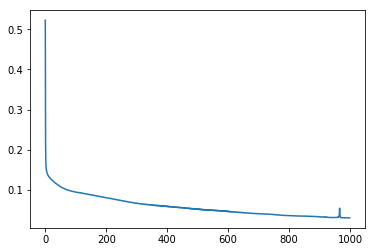

In [86]:
runNN(alpha = 0.03, number_steps = 1000)

In [83]:
import keras
from keras.models import Sequential
from keras.layers import Dense
classifier = Sequential()
classifier.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu', input_dim = 58))
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train_scaled, y_train, batch_size = 10, epochs = 7)
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

Using TensorFlow backend.


Epoch 1/7
750/750 [==============================] - 0s 280us/step - loss: 0.6662 - acc: 0.6453
Epoch 2/7
750/750 [==============================] - 0s 87us/step - loss: 0.5227 - acc: 0.7920
Epoch 3/7
750/750 [==============================] - 0s 85us/step - loss: 0.4793 - acc: 0.8027
Epoch 4/7
750/750 [==============================] - 0s 83us/step - loss: 0.4610 - acc: 0.8080
Epoch 5/7
750/750 [==============================] - 0s 83us/step - loss: 0.4472 - acc: 0.8187
Epoch 6/7
750/750 [==============================] - 0s 85us/step - loss: 0.4354 - acc: 0.8227
Epoch 7/7
750/750 [==============================] - 0s 83us/step - loss: 0.4240 - acc: 0.8253


In [88]:

class agent():
    def __init__(self,ID, katmanlar=[58,12,1]):
        self.katmanlar = katmanlar
        self.ID=ID
        self.H = [] 
        self.W=[]
        self.onlyOnce = True
    
    def feed(self,x=X_train_scaled,y=y_train):
        self.Y=y
        self.X=x
        self.b = [np.random.randn(k, 1) for k in self.katmanlar[1:]] 
        self.W = [5*np.random.randn(k2, k1) for k1, k2 in zip(self.katmanlar[:-1],self.katmanlar[1:])]
        self.score = self.performance()
    

   
    def immitate(self,other,pr=1):
        if np.random.rand() < pr:
            k =  random.randint(0,(self.katmanlar[1]-1))#11
            l =  random.randint(0,(self.katmanlar[1]-1))#11
            self.b[0][k]=other.b[0][k]
            self.W[0][k]=other.W[0][k]
            self.W[1][0][l]=other.W[1][0][l]
            self.score = self.performance()
    
    def innovate(self, pr = 1):
        if np.random.rand() < pr: 
            k =  random.randint(0,(self.katmanlar[1]-1))
            l =  random.randint(0,(self.katmanlar[1]-1))
            self.W[0][k] = np.random.randn(self.katmanlar[0])
            self.W[1][0][l] = np.random.randn()
            self.score = self.performance()
    
    def performance(self):
        
        abm_pred=self.predict() 
        n=len(abm_pred)
        scoree=1/(1+np.sum(np.power(self.Y - abm_pred,2)))
        
        return scoree
        
    
    def predict(self,X=X_train_scaled):
        l1=np.zeros(self.katmanlar[1])
        m,n=X.shape
        res=np.zeros(m)
        for k in range(m):#750 kez
            for i in range(self.katmanlar[1]):#12 kez
                WT=self.W[0][i]
                l2=np.dot(X[k],WT)+self.b[0][i]
                l1[i]=self.sigmoid(np.sum(l2))
            l2=self.sigmoid(np.dot(self.W[1][0],l1))
            res[k]=l2
        return res
    
    def sigmoid(self,z):
        return 1.0/(1.0+np.exp(-z))

              
class abmNeural():
    def __init__(self, X=X_train_scaled, y=y_train, N = 100, time = 1000,katmanlar=[58,12,1]):
        self.X, self.y, self.N, self.time = X, y, N, time
        self.population = [agent(i,katmanlar=[58,12,1]) for i in range(self.N)]
        
    def feed(self):
        for A in self.population:
            A.feed(self.X, self.y) 
    
    def social_optimisation(self):
        self.feed()
        for i in range(self.time):
            iA, iB = np.random.choice(range(self.N), 2, replace=False)
            A, B = self.population[iA], self.population[iB]
            
            if A.score > B.score: B.immitate(A)
            else: A.immitate(B)
                
            A.innovate();B.innovate()
            
            
    def best_agent(self):   
        scores = [A.score for A in self.population]
        ibest = scores.index(max(scores))
        return self.population[ibest]
        

    
    def predict(self, X_test=X_test_scaled, threshold = 0.5):
        
        res=self.best_agent().predict(X=X_test)
        m,n=X_test.shape
        
        return res
    


In [76]:
abm= abmNeural(X=X_train_scaled, y=y_train, N = 100, time = 1000,katmanlar=[58,12,1])
abm.social_optimisation()
abm_pred=abm.predict(X_test)
print(abm_pred.shape)

(250,)


In [81]:

n=len(abm_pred)

for i in range(n):
    if abm_pred[i]< 0.5:
        abm_pred[i]=0
    else :
        abm_pred[i]=1


In [82]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, abm_pred)
print("\t\t\t\t---Our Own Neural Network with ABM---")
print("confusion_matrix:\n", cm)
print("accuracy_score: ", accuracy_score(y_test, abm_pred))

				---Our Own Neural Network with ABM---
confusion_matrix:
 [[106  51]
 [ 14  79]]
accuracy_score:  0.74
